In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:



(x_train, Y_train), (x_test, Y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
"MEDV"
X_train = pd.DataFrame(data = x_train, columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
y_train = pd.DataFrame(data = Y_train, columns=["MEDV"])
X_test = pd.DataFrame(data = x_test, columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
y_test = pd.DataFrame(data = Y_test, columns=["MEDV"])



In [ ]:
tf.random.set_seed(42)

housePrice_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)

])

housePrice_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=1),
    metrics=["mae"]
)

housePrice_model.fit(X_train,y_train, epochs=5000)


Streaming output truncated to the last 5000 lines.
13/13 [==============================] - 0s 5ms/step - loss: 1.0198 - mae: 1.0198
Epoch 2502/5000
13/13 [==============================] - 0s 5ms/step - loss: 0.9171 - mae: 0.9171
Epoch 2503/5000
13/13 [==============================] - 0s 5ms/step - loss: 0.8826 - mae: 0.8826
Epoch 2504/5000
13/13 [==============================] - 0s 5ms/step - loss: 0.8182 - mae: 0.8182
Epoch 2505/5000
13/13 [==============================] - 0s 7ms/step - loss: 0.7791 - mae: 0.7791
Epoch 2506/5000
13/13 [==============================] - 0s 5ms/step - loss: 0.8421 - mae: 0.8421
Epoch 2507/5000
13/13 [==============================] - 0s 4ms/step - loss: 0.8776 - mae: 0.8776
Epoch 2508/5000
13/13 [==============================] - 0s 4ms/step - loss: 0.8049 - mae: 0.8049
Epoch 2509/5000
13/13 [==============================] - 0s 4ms/step - loss: 0.8457 - mae: 0.8457
Epoch 2510/5000
13/13 [==============================] - 0s 4ms/step - loss: 0.9465

In [ ]:
y_pred = housePrice_model.predict(X_test)


4/4 [==============================] - 0s 3ms/step


In [ ]:
import numpy as np

def plot_prediction(train_data=np.sum(X_train,axis=1),
                    train_labels=y_train,
                    test_data = np.sum(X_test,axis=1),
                    test_labels = y_test,
                    pred = y_pred):

  plt.scatter(train_data,train_labels,c="b",label="training")
  plt.scatter(test_data,test_labels,c="g",label="testing")
  plt.scatter(test_data, pred,c="r",label="predictions")
  plt.legend()


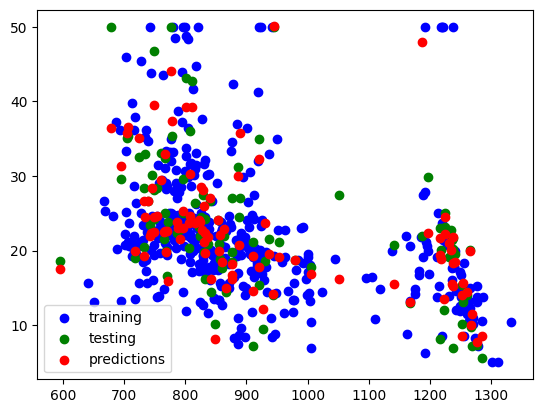

In [ ]:
plot_prediction()